In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#1a
SP = pd.read_csv("SpotifyFeatures.csv")  
#print(SP)                                                 # Reads .csv file
print(f"Songs: {len(SP.axes[0])}, song properties {len(SP.axes[1])}")     # Prints information about how many rows and columns the .csv file includes


Songs: 232725, song properties 18


In [3]:
#1b
SP2 = pd.read_csv("SpotifyFeatures.csv",usecols = ["genre","liveness","loudness"]) # Reads .csv file and filters out unnused columns

print(SP2)                                               

SP2 = SP2.loc[(SP2['genre'] == 'Pop') | (SP2['genre'] == 'Classical')]  # Filters out unwanted song genre

print(SP2)
                 
SP2 = SP2.replace({'Pop':1, 'Classical':0})                                              # Renames Opera to value 1, and Ska to value 0 for classification purposes

print(SP2)

        genre  liveness  loudness
0       Movie    0.3460    -1.828
1       Movie    0.1510    -5.559
2       Movie    0.1030   -13.879
3       Movie    0.0985   -12.178
4       Movie    0.2020   -21.150
...       ...       ...       ...
232720   Soul    0.0845   -10.626
232721   Soul    0.2370    -6.944
232722   Soul    0.0945    -8.282
232723   Soul    0.3330    -7.137
232724   Soul    0.0836    -6.708

[232725 rows x 3 columns]
            genre  liveness  loudness
104022  Classical    0.0762   -21.356
104023  Classical    0.1060   -34.255
104024  Classical    0.0916   -28.215
104025  Classical    0.1730   -37.264
104026  Classical    0.0858   -35.213
...           ...       ...       ...
167297  Classical    0.0776   -25.477
167298  Classical    0.2450   -28.192
167299  Classical    0.0816   -25.843
167300  Classical    0.1050   -20.238
167301  Classical    0.0953   -29.223

[18642 rows x 3 columns]
        genre  liveness  loudness
104022      0    0.0762   -21.356
104023      0  

In [14]:


# Create the input matrix
X = SP2[['liveness', 'loudness']].values

# Create the target vector
Y = SP2['genre'].values

print(X)
print(Y)

print(11)


[[  0.0762 -21.356 ]
 [  0.106  -34.255 ]
 [  0.0916 -28.215 ]
 ...
 [  0.0816 -25.843 ]
 [  0.105  -20.238 ]
 [  0.0953 -29.223 ]]
[0 0 0 ... 0 0 0]
11


In [5]:


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42) 

print(X_train)

print(y_train)

[[  0.108  -24.092 ]
 [  0.426   -6.559 ]
 [  0.0688  -6.186 ]
 ...
 [  0.0483 -27.894 ]
 [  0.106   -7.617 ]
 [  0.159   -4.353 ]]
[0 1 1 ... 0 1 1]


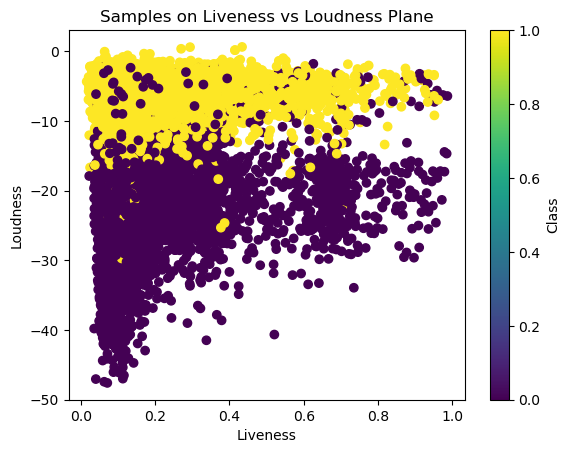

In [6]:
#1d
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis') # c is the color of the dots, cmap is the color map

plt.xlabel('Liveness')
plt.ylabel('Loudness')
plt.title('Samples on Liveness vs Loudness Plane')

# Add a colorbar legend
plt.colorbar(label='Class')

plt.show()

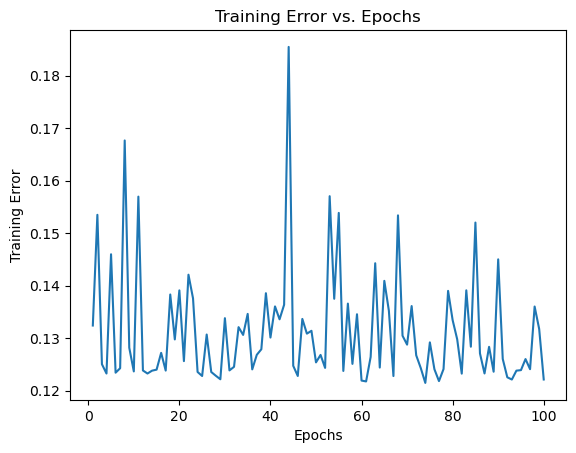

Accuracy on the training set: 0.9262388520083149


In [7]:
#2a

# Define the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression classifier
def logistic_regression(X, y, learning_rate, num_epochs):
    # Initialize the weights and bias
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0
    
    # Initialize lists to store training error and accuracy
    training_error = []
    training_accuracy = []
    
    # Iterate through each epoch
    for epoch in range(num_epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]
        
        # Iterate through each training sample
        for i in range(len(X)): #gradient descent?
            # Compute the predicted class probabilities
            z = np.dot(X[i], weights) + bias
            y_pred = sigmoid(z)
            
            # Update the weights and bias using gradient descent
            error = y_pred - y[i]
            weights -= learning_rate * error * X[i]
            bias -= learning_rate * error
            
        # Calculate the training error and accuracy
        y_pred = sigmoid(np.dot(X, weights) + bias)
        training_error.append(np.mean(np.abs(y_pred - y)))
        #training_error.append(y[i]*np.log(y_pred) + (1-y[i])*np.log(1-y_pred))
        training_accuracy.append(np.mean((y_pred >= 0.5) == y))
    
    return weights, bias, training_error, training_accuracy

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# Train the logistic regression classifier
weights, bias, training_error, training_accuracy = logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Plot the training error as a function of epochs
plt.plot(range(1, num_epochs+1), training_error)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epochs')
plt.show()

# Calculate the accuracy on the training set
accuracy = training_accuracy[-1]
print('Accuracy on the training set:', accuracy)

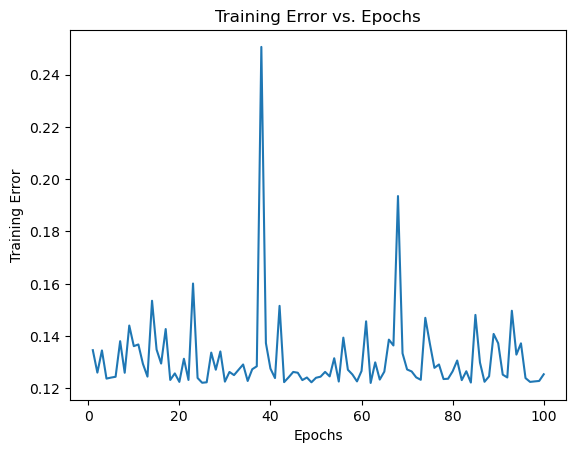

Accuracy on the training set: 0.9244283511030644


In [8]:
#2a

# Define the logistic function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the logistic regression classifier
def logistic_regression(X, y, learning_rate, num_epochs):
    # Initialize the weights and bias
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    bias = 0
    
    # Initialize lists to store training error and accuracy
    training_error = []
    training_accuracy = []
    
    # Iterate through each epoch
    for epoch in range(num_epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(X))
        X = X[indices]
        y = y[indices]
        
        # Iterate through each training sample
        for i in range(len(X)): #gradient descent?
            # Compute the predicted class probabilities
            z = np.dot(X[i], weights) + bias
            y_pred = sigmoid(z)
            
            # Update the weights and bias using gradient descent
            error = y_pred - y[i]
            weights -= learning_rate * error * X[i]
            bias -= learning_rate * error
            
        # Calculate the training error and accuracy
        y_pred = sigmoid(np.dot(X, weights) + bias)
        training_error.append(np.mean(np.abs(y_pred - y)))
        training_accuracy.append(np.mean((y_pred >= 0.5) == y))
    
    return weights, bias, training_error, training_accuracy

# Set the learning rate and number of epochs
learning_rate = 0.01
num_epochs = 100

# Train the logistic regression classifier
weights, bias, training_error, training_accuracy = logistic_regression(X_train, y_train, learning_rate, num_epochs)

# Plot the training error as a function of epochs
plt.plot(range(1, num_epochs+1), training_error)
plt.xlabel('Epochs')
plt.ylabel('Training Error')
plt.title('Training Error vs. Epochs')
plt.show()

# Calculate the accuracy on the training set
accuracy = training_accuracy[-1]
print('Accuracy on the training set:', accuracy)

In [9]:
learning_rates = [0.001, 0.01, 0.1, 1.0]  # Different learning rates to try

# Initialize empty lists to store training accuracies for each learning rate
training_accuracies = []

# Iterate through each learning rate
for learning_rate in learning_rates:
    # Train the logistic regression classifier
    weights, bias, training_error, training_accuracy = logistic_regression(X_train, y_train, learning_rate, num_epochs)
    
    # Append the training accuracy to the list
    training_accuracies.append(training_accuracy[-1])

# Print the results
for i in range(len(learning_rates)):
    print(f"Learning Rate: {learning_rates[i]}, Training Accuracy: {training_accuracies[i]}")



C:\Users\pette\AppData\Local\Temp\ipykernel_22480\451558470.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Learning Rate: 0.001, Training Accuracy: 0.9262388520083149
Learning Rate: 0.01, Training Accuracy: 0.9268423523100651
Learning Rate: 0.1, Training Accuracy: 0.8328974720042915
Learning Rate: 1.0, Training Accuracy: 0.9263059075973983


The training accuracy can vary for different learning rates because the learning rate determines the step size taken during the gradient descent optimization process. Gradient descent is an iterative algorithm used to update the weights and bias of the logistic regression model based on the training data.

When the learning rate is too small, the algorithm takes small steps towards the optimal solution. This can result in slow convergence and the model may require more epochs to reach a good accuracy. On the other hand, if the learning rate is too large, the algorithm may overshoot the optimal solution and fail to converge. This can lead to unstable training and lower accuracy.

In [10]:
# Calculate the predicted class probabilities for the test set
y_pred_test = sigmoid(np.dot(X_test, weights) + bias)

# Convert the predicted probabilities to binary predictions
y_pred_test_binary = (y_pred_test >= 0.5).astype(int)

# Calculate the accuracy on the test set
accuracy_test = np.mean(y_pred_test_binary == y_test)

# Print the accuracy on the test set
print('Accuracy on the test set:', accuracy_test)

Accuracy on the test set: 0.9270581925449182


The significant difference between the accuracy on the training and test set can be attributed to a phenomenon called overfitting. Overfitting occurs when a machine learning model performs extremely well on the training data but fails to generalize well to new, unseen data.

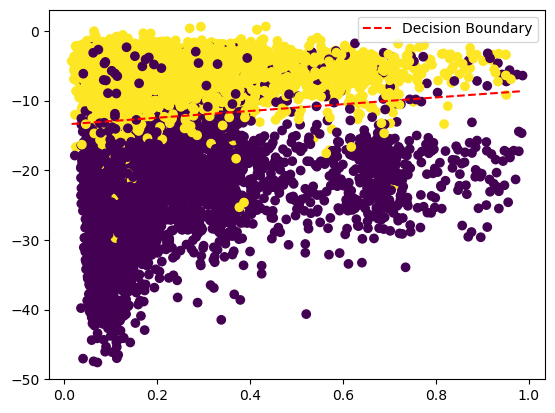

In [11]:
# Calculate the slope and y-intercept of the decision boundary line
slope = -weights[0] / weights[1]
intercept = -bias / weights[1]

# Generate x values for the decision boundary line
x_values = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)

# Calculate corresponding y values for the decision boundary line
y_values = slope * x_values + intercept

# Plot the decision boundary line
plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='viridis')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

In [12]:
#P3

from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1634  217]
 [  55 1823]]


In [13]:
# Calculate the number of classes
num_classes = len(np.unique(y_test))

# Initialize the confusion matrix
confusion_matrix = np.zeros((num_classes, num_classes), dtype=int)

# Iterate through each sample in the test set
for i in range(len(y_test)):
    # Get the predicted and actual labels
    predicted_label = y_pred_test_binary[i]
    actual_label = int(y_test[i])
    
    # Increment the corresponding cell in the confusion matrix
    confusion_matrix[actual_label, predicted_label] += 1

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix)

Confusion Matrix:
[[1634  217]
 [  55 1823]]


The confusion matrix provides more detailed information about the performance of the classifier on the test set compared to the accuracy score. It gives a breakdown of the predictions made by the classifier, showing the number of true positives, true negatives, false positives, and false negatives. 

From the confusion matrix, we can determine:
- True Positives (TP): The number of positive instances correctly predicted as positive.
- True Negatives (TN): The number of negative instances correctly predicted as negative.
- False Positives (FP): The number of negative instances incorrectly predicted as positive.
- False Negatives (FN): The number of positive instances incorrectly predicted as negative.

By analyzing these values, we can gain insights into the classifier's performance in terms of both precision and recall. Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive, while recall measures the proportion of correctly predicted positive instances out of all actual positive instances.

The confusion matrix allows us to calculate additional evaluation metrics such as precision, recall, and F1 score, which provide a more comprehensive understanding of the classifier's performance beyond just accuracy.